<a href="https://colab.research.google.com/github/SumitDS23/MEDICAL_INSURANCE_PREDICTION/blob/main/BDNS_ET_C23015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -qq install pymongo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 603.6/603.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 12.3 MB/s eta 0:00:00


In [ ]:
!pip3 -q install pyspark
from pyspark.sql import SparkSession

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import pandas as pd
import dateutil
import numpy as np
import pymongo
from pymongo import MongoClient
import json
from urllib.parse import quote_plus
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark.sql.types import *
from pyspark.sql.functions import *
import pyspark.sql.functions as F
from pyspark.sql.functions import col, asc, desc, sum as spark_sum, lit
from pyspark.sql import SQLContext
from pyspark.mllib.stat import Statistics
from pyspark.sql.functions import udf
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler,StandardScaler
from pyspark.ml import Pipeline
from sklearn.metrics import confusion_matrix
from pyspark.sql.functions import corr
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import DenseVector
from pyspark.ml.feature import StandardScaler
from pyspark.ml.regression import LinearRegression,DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
dataframe=pd.read_csv("/content/salaries.csv")

In [ ]:
data=dataframe.to_dict(orient="records")
data[:2]

[{'work_year': 2022,
  'experience_level': 'SE',
  'employment_type': 'FT',
  'job_title': 'Marketing Data Analyst',
  'salary': 200000,
  'salary_currency': 'USD',
  'salary_in_usd': 200000,
  'employee_residence': 'GB',
  'remote_ratio': 100,
  'company_location': 'GB',
  'company_size': 'S'},
 {'work_year': 2022,
  'experience_level': 'EN',
  'employment_type': 'FT',
  'job_title': 'Data Scientist',
  'salary': 96000,
  'salary_currency': 'CAD',
  'salary_in_usd': 74378,
  'employee_residence': 'CA',
  'remote_ratio': 100,
  'company_location': 'CA',
  'company_size': 'L'}]

In [ ]:
!curl -fsSL https://pgp.mongodb.com/server-6.0.asc | \
   sudo gpg -o /usr/share/keyrings/mongodb-server-6.0.gpg \
   --dearmor
!echo "deb [ arch=amd64,arm64 signed-by=/usr/share/keyrings/mongodb-server-6.0.gpg ] https://repo.mongodb.org/apt/ubuntu jammy/mongodb-org/6.0 multiverse" | sudo tee /etc/apt/sources.list.d/mongodb-org-6.0.list
!sudo apt-get update > /dev/null
!sudo apt-get install -y mongodb-org > /dev/null
!sudo mkdir -p /var/log/mongodb /var/lib/mongodb
!sudo chown `whoami` /var/lib/mongodb /var/log/mongodb/

gpg: cannot open '/dev/tty': No such device or address
curl: (23) Failed writing body
deb [ arch=amd64,arm64 signed-by=/usr/share/keyrings/mongodb-server-6.0.gpg ] https://repo.mongodb.org/apt/ubuntu jammy/mongodb-org/6.0 multiverse


In [ ]:
!nohup mongod --config /etc/mongod.conf &

nohup: appending output to 'nohup.out'


In [ ]:
url = "mongodb://localhost:27017"
client = MongoClient(url)
client.list_database_names()

['BDNS', 'admin', 'config', 'local']

In [ ]:
db = client["BDNS"]

In [ ]:
client.list_database_names()

['BDNS', 'admin', 'config', 'local']

In [ ]:
df = db.BDNS
df.count_documents({})

1195

In [ ]:
db.BDNS.insert_many(data)

In [ ]:
db.list_collection_names()

['BDNS']

In [ ]:
ab=db.BDNS
cd=db.BDNS.find()
list_cursor=list(cd)
print(list_cursor)

[{'_id': ObjectId('64d9cb3a3217e0fdde721f8f'), 'work_year': 2022, 'experience_level': 'SE', 'employment_type': 'FT', 'job_title': 'Marketing Data Analyst', 'salary': 200000, 'salary_currency': 'USD', 'salary_in_usd': 200000, 'employee_residence': 'GB', 'remote_ratio': 100, 'company_location': 'GB', 'company_size': 'S'}, {'_id': ObjectId('64d9cb3a3217e0fdde721f90'), 'work_year': 2022, 'experience_level': 'EN', 'employment_type': 'FT', 'job_title': 'Data Scientist', 'salary': 96000, 'salary_currency': 'CAD', 'salary_in_usd': 74378, 'employee_residence': 'CA', 'remote_ratio': 100, 'company_location': 'CA', 'company_size': 'L'}, {'_id': ObjectId('64d9cb3a3217e0fdde721f91'), 'work_year': 2022, 'experience_level': 'SE', 'employment_type': 'FT', 'job_title': 'Data Science Lead', 'salary': 165000, 'salary_currency': 'USD', 'salary_in_usd': 165000, 'employee_residence': 'US', 'remote_ratio': 50, 'company_location': 'US', 'company_size': 'S'}, {'_id': ObjectId('64d9cb3a3217e0fdde721f92'), 'work_

In [ ]:
salary_data=pd.DataFrame(list_cursor)

In [ ]:
salary_data.head()

,_id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,64d9cb3a3217e0fdde721f8f,2022,SE,FT,Marketing Data Analyst,200000,USD,200000,GB,100,GB,S
1,64d9cb3a3217e0fdde721f90,2022,EN,FT,Data Scientist,96000,CAD,74378,CA,100,CA,L
2,64d9cb3a3217e0fdde721f91,2022,SE,FT,Data Science Lead,165000,USD,165000,US,50,US,S
3,64d9cb3a3217e0fdde721f92,2022,EN,FT,Data Scientist,27000,GBP,33599,GB,50,GB,L
4,64d9cb3a3217e0fdde721f93,2022,SE,FT,Data Engineer,185900,USD,185900,US,0,US,M


In [ ]:
spark = SparkSession.builder.appName('BDNS').getOrCreate()

In [ ]:
spark_data=spark.read.csv('/content/salaries.csv',inferSchema=True,header=True)

In [ ]:
spark_data.printSchema()

root
 |-- work_year: integer (nullable = true)
 |-- experience_level: string (nullable = true)
 |-- employment_type: string (nullable = true)
 |-- job_title: string (nullable = true)
 |-- salary: integer (nullable = true)
 |-- salary_currency: string (nullable = true)
 |-- salary_in_usd: integer (nullable = true)
 |-- employee_residence: string (nullable = true)
 |-- remote_ratio: integer (nullable = true)
 |-- company_location: string (nullable = true)
 |-- company_size: string (nullable = true)



In [ ]:
spark_data.count(), len(spark_data.columns)

(1195, 11)

In [ ]:
spark_data.describe().show()

+-------+------------------+----------------+---------------+--------------------+------------------+---------------+------------------+------------------+-----------------+----------------+------------+
|summary|         work_year|experience_level|employment_type|           job_title|            salary|salary_currency|     salary_in_usd|employee_residence|     remote_ratio|company_location|company_size|
+-------+------------------+----------------+---------------+--------------------+------------------+---------------+------------------+------------------+-----------------+----------------+------------+
|  count|              1195|            1195|           1195|                1195|              1195|           1195|              1195|              1195|             1195|            1195|        1195|
|   mean| 2021.684518828452|            null|           null|                null| 249521.0251046025|           null|122041.14225941422|              null|66.73640167364017|           

#### Checking For Null Values

In [ ]:
null_count_exprs = [
    spark_sum(col(col_name).isNull().cast("int")).alias(col_name + "_null_count")
    for col_name in spark_data.columns
]

In [ ]:
spark_data = spark_data.withColumn("dummy_group", lit(1))

In [ ]:
data_with_null_counts = spark_data.groupBy("dummy_group").agg(*null_count_exprs)
data_with_null_counts.show()

+-----------+--------------------+---------------------------+--------------------------+--------------------+-----------------+--------------------------+------------------------+-----------------------------+-----------------------+---------------------------+-----------------------+
|dummy_group|work_year_null_count|experience_level_null_count|employment_type_null_count|job_title_null_count|salary_null_count|salary_currency_null_count|salary_in_usd_null_count|employee_residence_null_count|remote_ratio_null_count|company_location_null_count|company_size_null_count|
+-----------+--------------------+---------------------------+--------------------------+--------------------+-----------------+--------------------------+------------------------+-----------------------------+-----------------------+---------------------------+-----------------------+
|          1|                   0|                          0|                         0|                   0|                0|           

#### Checking for the Experience Categories and their value

In [ ]:
spark_data.groupBy("experience_level").count().sort("experience_level").show()

+----------------+-----+
|experience_level|count|
+----------------+-----+
|              EN|  138|
|              EX|   41|
|              MI|  314|
|              SE|  702|
+----------------+-----+



#### Adding a current year section to check how many years of experience they have

In [ ]:
data2 = spark_data.withColumn("current_year",year(current_date()))
data2.show(5)

+---------+----------------+---------------+--------------------+------+---------------+-------------+------------------+------------+----------------+------------+-----------+------------+
|work_year|experience_level|employment_type|           job_title|salary|salary_currency|salary_in_usd|employee_residence|remote_ratio|company_location|company_size|dummy_group|current_year|
+---------+----------------+---------------+--------------------+------+---------------+-------------+------------------+------------+----------------+------------+-----------+------------+
|     2022|              SE|             FT|Marketing Data An...|200000|            USD|       200000|                GB|         100|              GB|           S|          1|        2023|
|     2022|              EN|             FT|      Data Scientist| 96000|            CAD|        74378|                CA|         100|              CA|           L|          1|        2023|
|     2022|              SE|             FT|   Dat

In [ ]:
data2.printSchema()

root
 |-- work_year: integer (nullable = true)
 |-- experience_level: string (nullable = true)
 |-- employment_type: string (nullable = true)
 |-- job_title: string (nullable = true)
 |-- salary: integer (nullable = true)
 |-- salary_currency: string (nullable = true)
 |-- salary_in_usd: integer (nullable = true)
 |-- employee_residence: string (nullable = true)
 |-- remote_ratio: integer (nullable = true)
 |-- company_location: string (nullable = true)
 |-- company_size: string (nullable = true)
 |-- dummy_group: integer (nullable = false)
 |-- current_year: integer (nullable = false)



In [ ]:
data2 = data2.withColumn("EXP_in_yrs",data2.current_year - data2.work_year)
data2.show(5)

+---------+----------------+---------------+--------------------+------+---------------+-------------+------------------+------------+----------------+------------+-----------+------------+----------+
|work_year|experience_level|employment_type|           job_title|salary|salary_currency|salary_in_usd|employee_residence|remote_ratio|company_location|company_size|dummy_group|current_year|EXP_in_yrs|
+---------+----------------+---------------+--------------------+------+---------------+-------------+------------------+------------+----------------+------------+-----------+------------+----------+
|     2022|              SE|             FT|Marketing Data An...|200000|            USD|       200000|                GB|         100|              GB|           S|          1|        2023|         1|
|     2022|              EN|             FT|      Data Scientist| 96000|            CAD|        74378|                CA|         100|              CA|           L|          1|        2023|       

In [ ]:
data2.count()

1195

In [ ]:
len(data2.columns)

14

In [ ]:
columns = data2.columns

In [ ]:
for col_name in columns:
    group_data = data2.groupBy(col_name).count().sort(col_name, ascending=True)
    print(f"Column: {col_name}")
    group_data.show()
    print("\n")

Column: work_year
+---------+-----+
|work_year|count|
+---------+-----+
|     2020|   75|
|     2021|  227|
|     2022|  893|
+---------+-----+



Column: experience_level
+----------------+-----+
|experience_level|count|
+----------------+-----+
|              EN|  138|
|              EX|   41|
|              MI|  314|
|              SE|  702|
+----------------+-----+



Column: employment_type
+---------------+-----+
|employment_type|count|
+---------------+-----+
|             CT|    8|
|             FL|    5|
|             FT| 1170|
|             PT|   12|
+---------------+-----+



Column: job_title
+--------------------+-----+
|           job_title|count|
+--------------------+-----+
|3D Computer Visio...|    2|
|        AI Scientist|   12|
|  Analytics Engineer|   37|
|Applied Data Scie...|    6|
|Applied Machine L...|    9|
|   Applied Scientist|    4|
|          BI Analyst|    1|
|     BI Data Analyst|   12|
|  Big Data Architect|    1|
|   Big Data Engineer|    9|
|Business D

In [ ]:
while columns:
    col_name = columns.pop(0)
    group_data = data2.groupBy(col_name).mean('Salary')
    print(f"Column: {col_name}")
    group_data.show()
    print("\n")

Column: work_year
+---------+------------------+
|work_year|       avg(Salary)|
+---------+------------------+
|     2022|165792.63493840984|
|     2020|         394024.12|
|     2021| 531158.5594713656|
+---------+------------------+



Column: experience_level
+----------------+------------------+
|experience_level|       avg(Salary)|
+----------------+------------------+
|              EX| 340953.0487804878|
|              MI|378482.89171974524|
|              EN| 235364.4927536232|
|              SE|189280.08831908833|
+----------------+------------------+



Column: employment_type
+---------------+------------------+
|employment_type|       avg(Salary)|
+---------------+------------------+
|             FT|250789.20085470084|
|             PT| 90396.66666666667|
|             CT|          134687.5|
|             FL|          518400.0|
+---------------+------------------+



Column: job_title
+--------------------+------------------+
|           job_title|       avg(Salary)|
+----

In [ ]:
df = data2.toPandas()
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,dummy_group,current_year,EXP_in_yrs
0,2022,SE,FT,Marketing Data Analyst,200000,USD,200000,GB,100,GB,S,1,2023,1
1,2022,EN,FT,Data Scientist,96000,CAD,74378,CA,100,CA,L,1,2023,1
2,2022,SE,FT,Data Science Lead,165000,USD,165000,US,50,US,S,1,2023,1
3,2022,EN,FT,Data Scientist,27000,GBP,33599,GB,50,GB,L,1,2023,1
4,2022,SE,FT,Data Engineer,185900,USD,185900,US,0,US,M,1,2023,1


In [ ]:
corr_mat = df.corr()
corr_mat

<ipython-input-108-07cbaa27f8e2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


,work_year,salary,salary_in_usd,remote_ratio,dummy_group,current_year,EXP_in_yrs
work_year,1.000000,-0.107892,0.213543,-0.012700,NaN,NaN,-1.000000
salary,-0.107892,1.000000,-0.069914,0.002690,NaN,NaN,0.107892
salary_in_usd,0.213543,-0.069914,1.000000,0.032861,NaN,NaN,-0.213543
remote_ratio,-0.012700,0.002690,0.032861,1.000000,NaN,NaN,0.012700
dummy_group,NaN,NaN,NaN,NaN,NaN,NaN,NaN
current_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EXP_in_yrs,-1.000000,0.107892,-0.213543,0.012700,NaN,NaN,1.000000


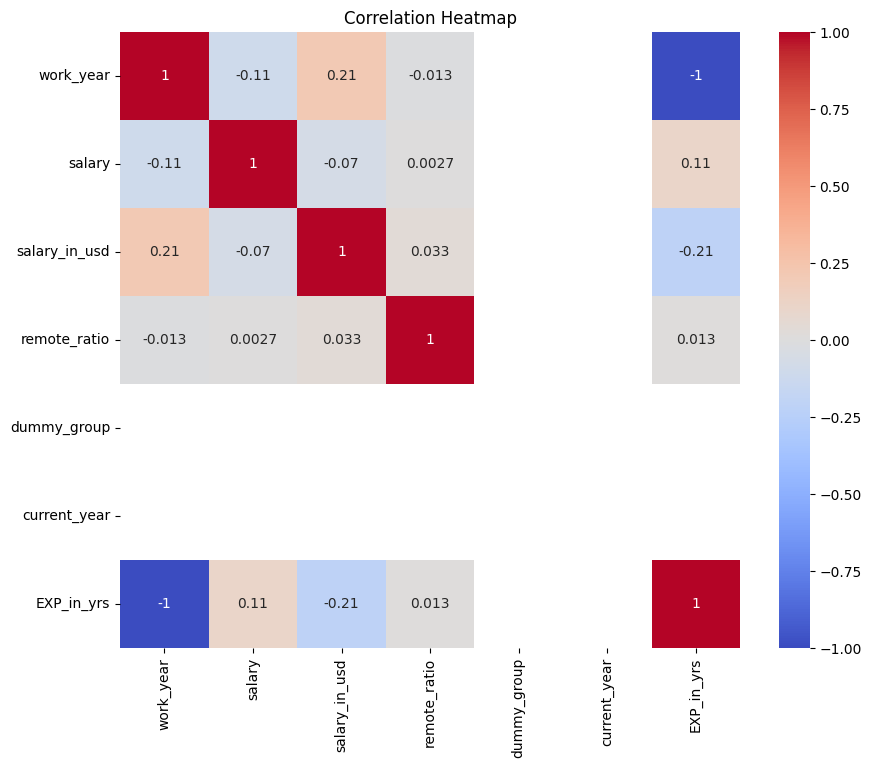

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

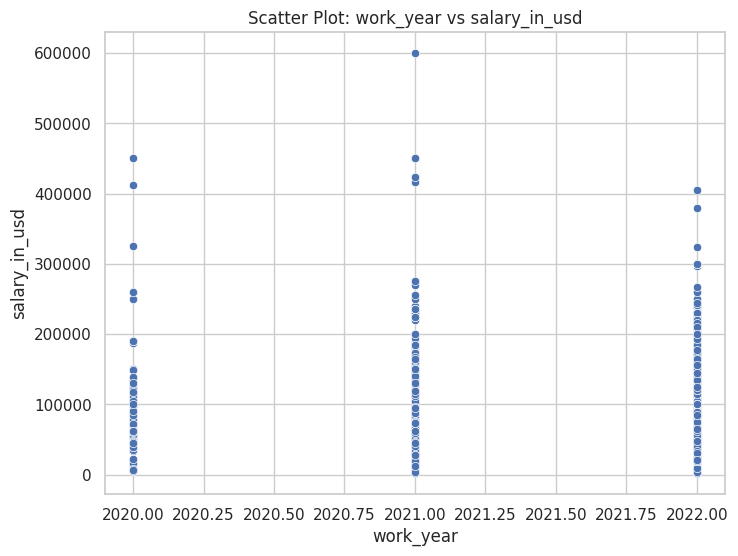

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="work_year", y="salary_in_usd")
plt.title("Scatter Plot: work_year vs salary_in_usd")
plt.show()

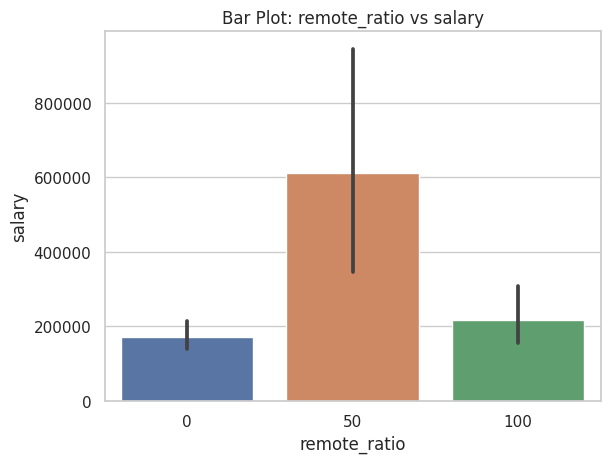

In [ ]:
sns.barplot(data=df, x="remote_ratio", y="salary")
plt.title("Bar Plot: remote_ratio vs salary")
plt.show()

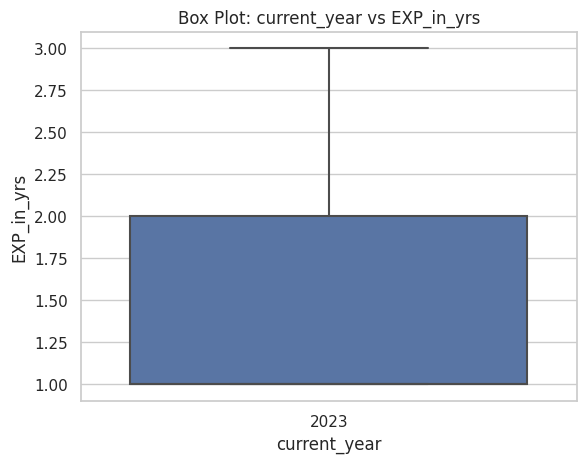

In [ ]:
sns.boxplot(data=df, x="current_year", y="EXP_in_yrs")
plt.title("Box Plot: current_year vs EXP_in_yrs")
plt.show()

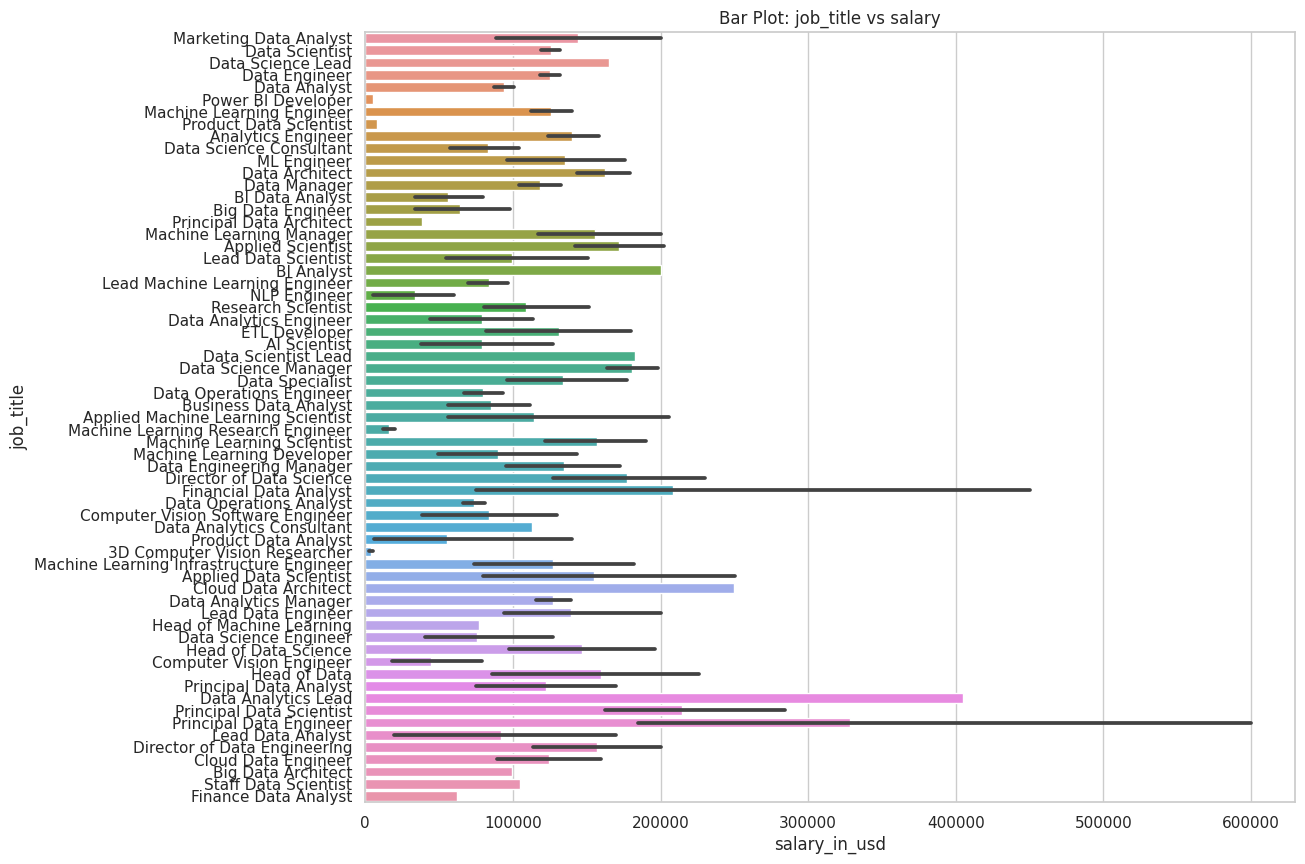

In [ ]:
plt.figure(figsize=(12, 10))
sns.barplot(data=df, y="job_title", x="salary_in_usd", orient="h")
plt.title("Bar Plot: job_title vs salary")
plt.show()

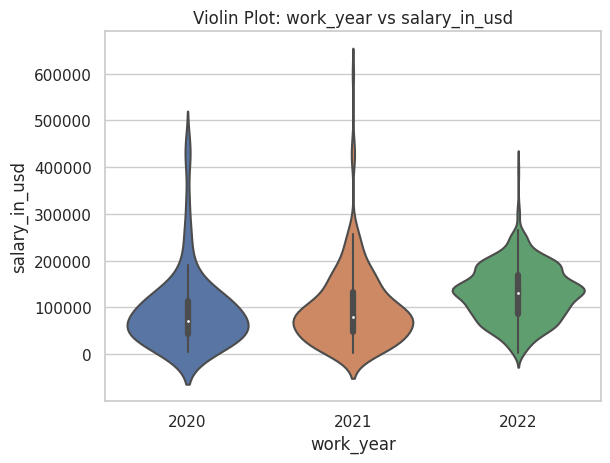

In [ ]:
sns.violinplot(data=df, x="work_year", y="salary_in_usd")
plt.title("Violin Plot: work_year vs salary_in_usd")
plt.show()

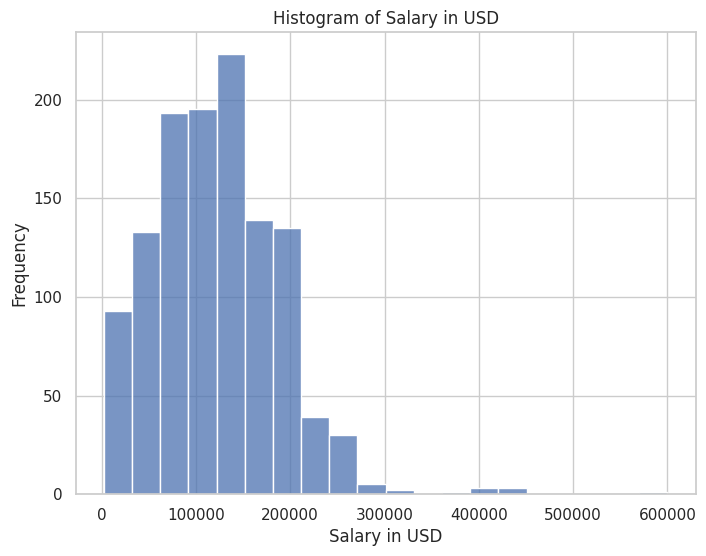

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="salary_in_usd", bins=20)
plt.title("Histogram of Salary in USD")
plt.xlabel("Salary in USD")
plt.ylabel("Frequency")
plt.show()

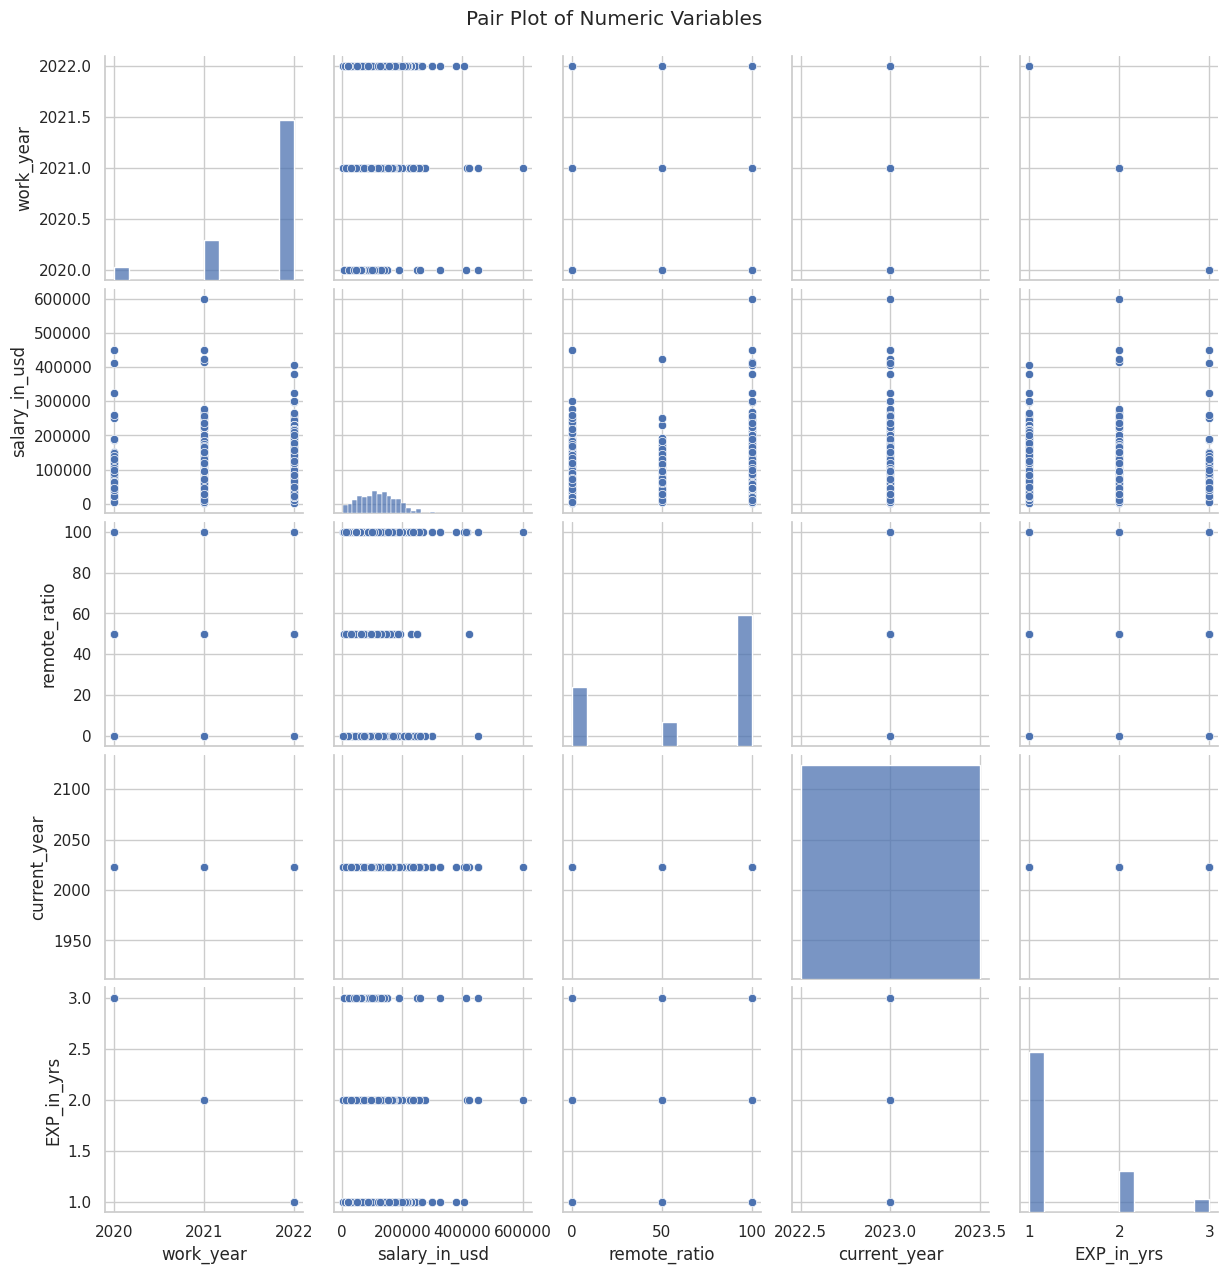

In [ ]:
sns.pairplot(df[['work_year', 'salary_in_usd', 'remote_ratio', 'current_year', 'EXP_in_yrs']])
plt.suptitle("Pair Plot of Numeric Variables", y=1.02)
plt.show()

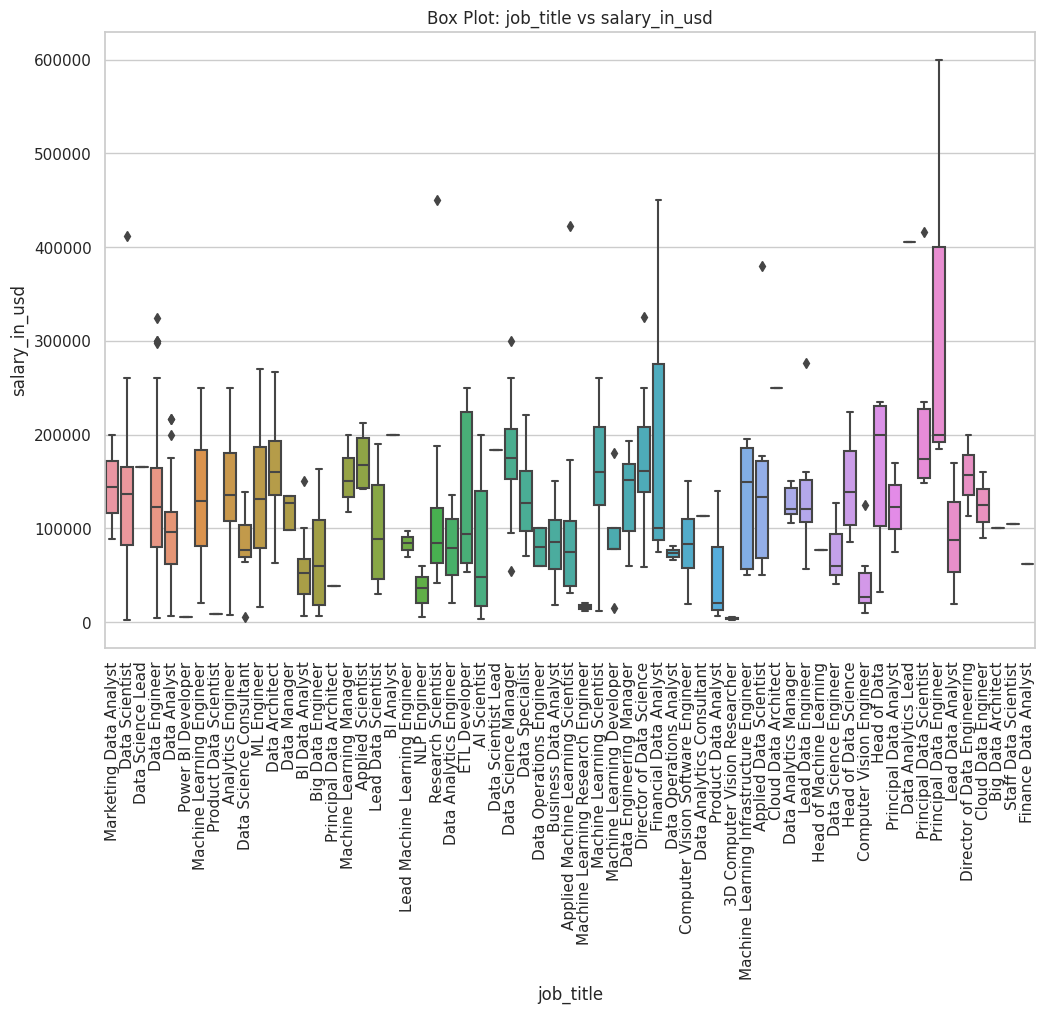

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="job_title", y="salary_in_usd")
plt.title("Box Plot: job_title vs salary_in_usd")
plt.xticks(rotation=90)
plt.show()

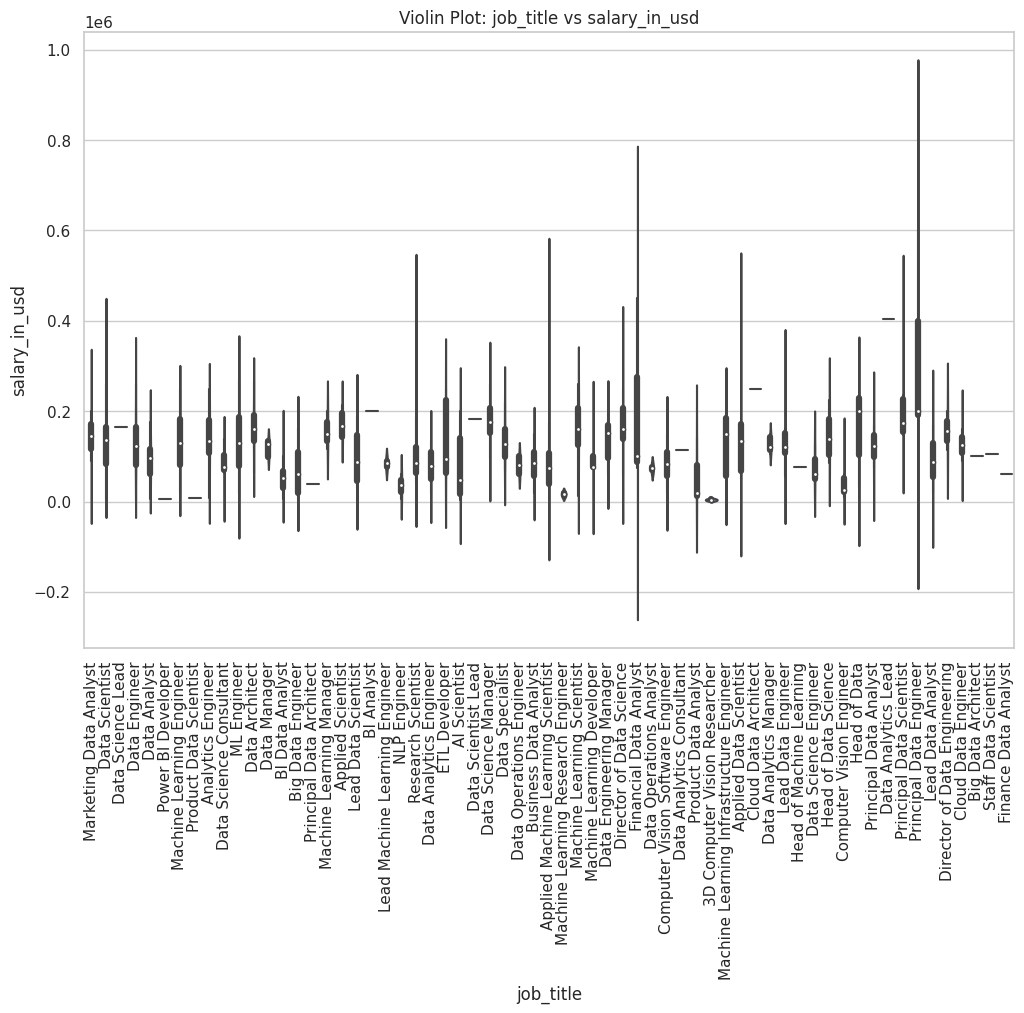

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x="job_title", y="salary_in_usd")
plt.title("Violin Plot: job_title vs salary_in_usd")
plt.xticks(rotation=90)
plt.show()

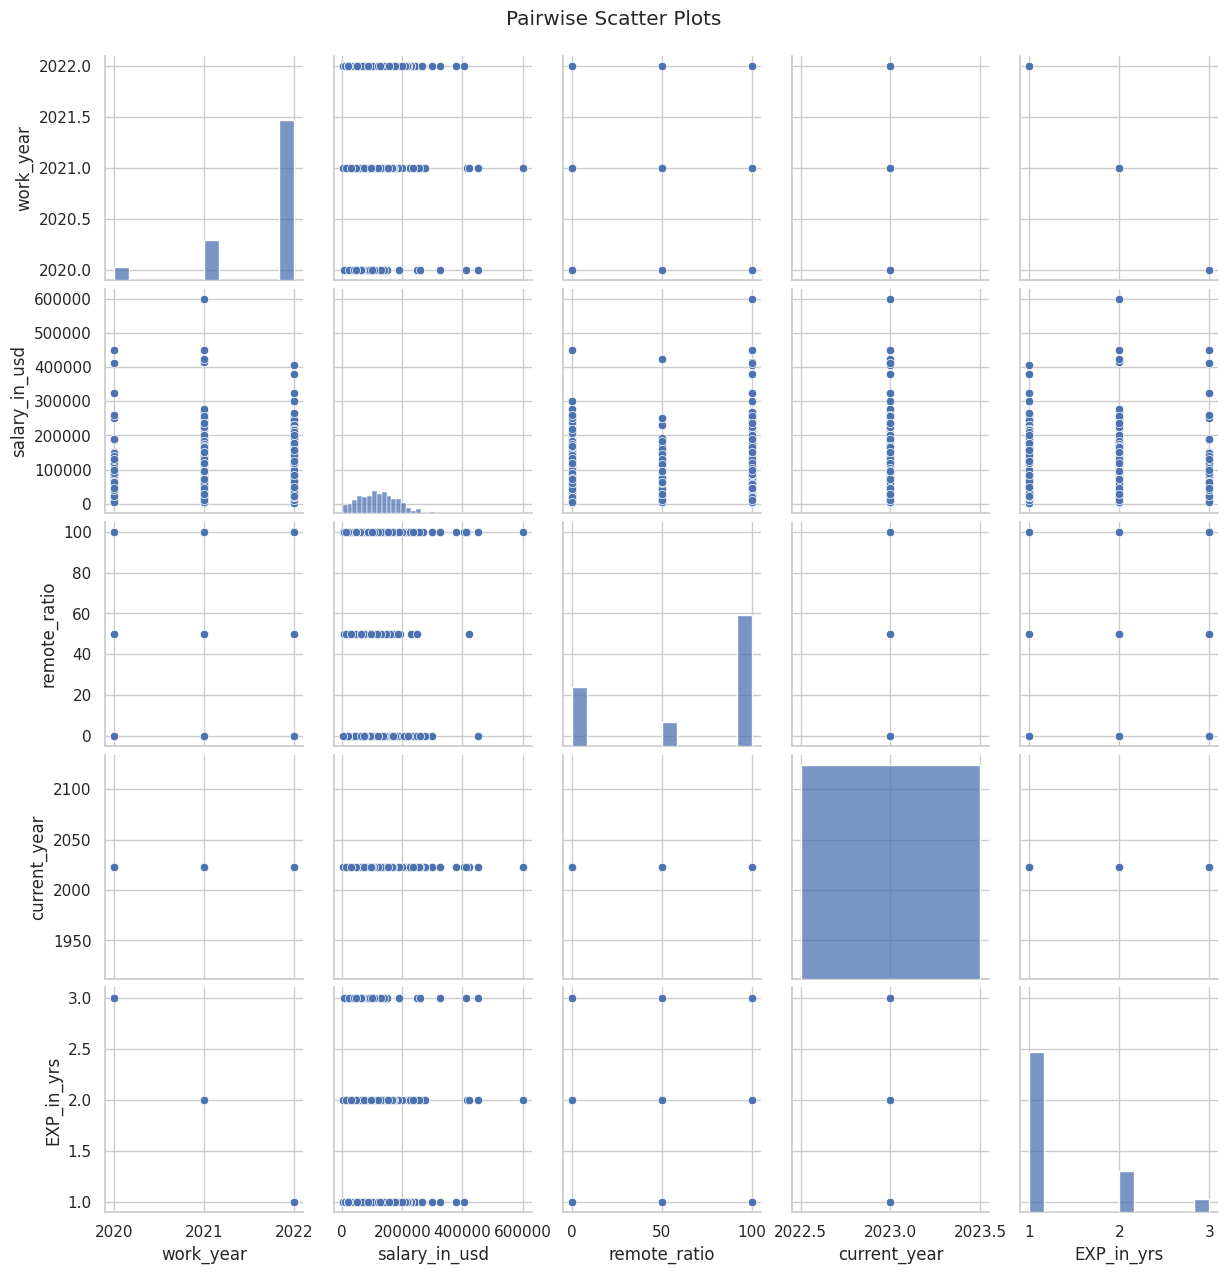

In [ ]:
sns.pairplot(df[['work_year', 'salary_in_usd', 'remote_ratio', 'current_year', 'EXP_in_yrs']])
plt.suptitle("Pairwise Scatter Plots", y=1.02)
plt.show()

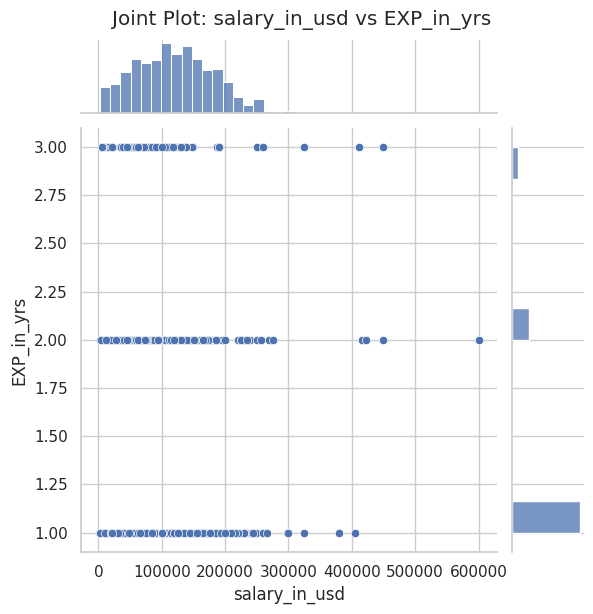

In [ ]:
sns.jointplot(data=df, x="salary_in_usd", y="EXP_in_yrs", kind="scatter")
plt.suptitle("Joint Plot: salary_in_usd vs EXP_in_yrs", y=1.02)
plt.show()

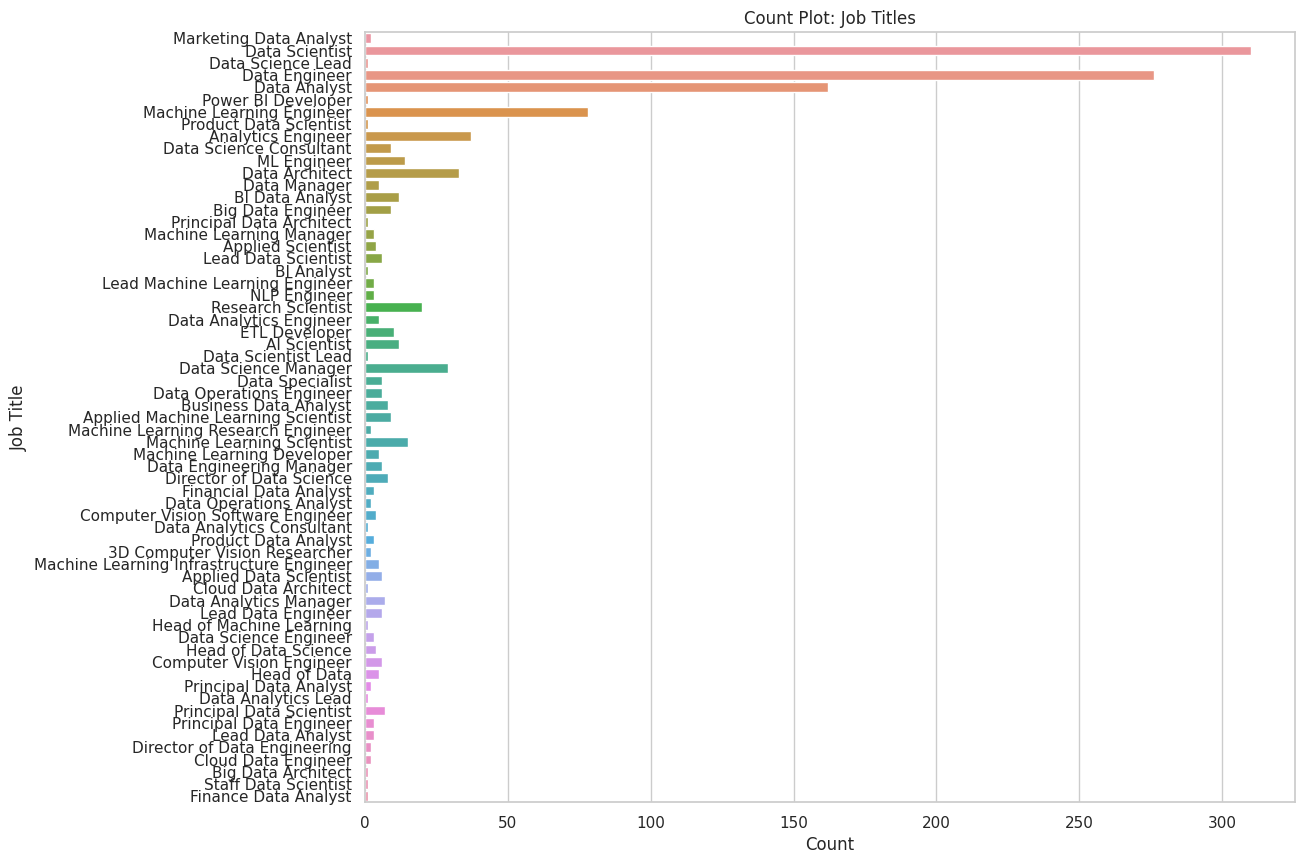

In [ ]:
plt.figure(figsize=(12, 10))
sns.countplot(data=df, y="job_title")
plt.title("Count Plot: Job Titles")
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.show()

<ipython-input-122-6436bb73acad>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['salary_in_usd'], bins=20, kde=True)


<Axes: ylabel='Density'>

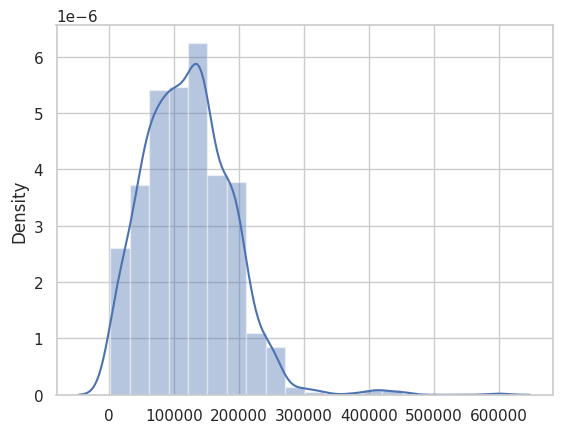

In [ ]:
sns.distplot(x=df['salary_in_usd'], bins=20, kde=True)

In [ ]:
type(data2)

pyspark.sql.dataframe.DataFrame

In [ ]:
data2 = data2.drop("current_date", "current_year", "name","year")
data2.show(5)

+---------+----------------+---------------+--------------------+------+---------------+-------------+------------------+------------+----------------+------------+-----------+----------+
|work_year|experience_level|employment_type|           job_title|salary|salary_currency|salary_in_usd|employee_residence|remote_ratio|company_location|company_size|dummy_group|EXP_in_yrs|
+---------+----------------+---------------+--------------------+------+---------------+-------------+------------------+------------+----------------+------------+-----------+----------+
|     2022|              SE|             FT|Marketing Data An...|200000|            USD|       200000|                GB|         100|              GB|           S|          1|         1|
|     2022|              EN|             FT|      Data Scientist| 96000|            CAD|        74378|                CA|         100|              CA|           L|          1|         1|
|     2022|              SE|             FT|   Data Science 

In [ ]:
type_indexer = StringIndexer(inputCol="experience_level", outputCol="experience_level_indexer").fit(data2)
data2 = type_indexer.transform(data2)

In [ ]:
type_encoder = OneHotEncoder(inputCol="experience_level_indexer", outputCol="experience_level_Vector").fit(data2)
data2 = type_encoder.transform(data2)

In [ ]:
type_indexer = StringIndexer(inputCol="employment_type", outputCol="employment_type_indexer").fit(data2)
data2 = type_indexer.transform(data2)

In [ ]:
type_encoder = OneHotEncoder(inputCol="employment_type_indexer", outputCol="employment_type_vector").fit(data2)
data2 = type_encoder.transform(data2)

In [ ]:
type_indexer = StringIndexer(inputCol="job_title", outputCol="job_title_indexer").fit(data2)
data2 = type_indexer.transform(data2)

In [ ]:
type_encoder = OneHotEncoder(inputCol="job_title_indexer", outputCol="job_title_vector").fit(data2)
data2 = type_encoder.transform(data2)

In [ ]:
type_indexer = StringIndexer(inputCol="employee_residence", outputCol="employee_residence_indexer").fit(data2)
data2 = type_indexer.transform(data2)

In [ ]:
type_encoder = OneHotEncoder(inputCol="employee_residence_indexer", outputCol="employee_residence_vector").fit(data2)
data2 = type_encoder.transform(data2)

In [ ]:
type_indexer = StringIndexer(inputCol="remote_ratio", outputCol="remote_ratio_indexer").fit(data2)
data2 = type_indexer.transform(data2)

In [ ]:
type_encoder = OneHotEncoder(inputCol="remote_ratio_indexer", outputCol="remote_ratio_vector").fit(data2)
data2 = type_encoder.transform(data2)

In [ ]:
type_indexer = StringIndexer(inputCol="company_location", outputCol="company_location_indexer").fit(data2)
data2 = type_indexer.transform(data2)

In [ ]:
type_encoder = OneHotEncoder(inputCol="company_location_indexer", outputCol="company_location_vector").fit(data2)
data2 = type_encoder.transform(data2)

In [ ]:
type_indexer = StringIndexer(inputCol="company_size", outputCol="company_size_indexer").fit(data2)
data2 = type_indexer.transform(data2)

In [ ]:
type_encoder = OneHotEncoder(inputCol="company_size_indexer", outputCol="company_size_vector").fit(data2)
data2 = type_encoder.transform(data2)

In [ ]:
data2.show(5)

+---------+----------------+---------------+--------------------+------+---------------+-------------+------------------+------------+----------------+------------+-----------+----------+------------------------+-----------------------+-----------------------+----------------------+-----------------+----------------+--------------------------+-------------------------+--------------------+-------------------+------------------------+-----------------------+--------------------+-------------------+
|work_year|experience_level|employment_type|           job_title|salary|salary_currency|salary_in_usd|employee_residence|remote_ratio|company_location|company_size|dummy_group|EXP_in_yrs|experience_level_indexer|experience_level_Vector|employment_type_indexer|employment_type_vector|job_title_indexer|job_title_vector|employee_residence_indexer|employee_residence_vector|remote_ratio_indexer|remote_ratio_vector|company_location_indexer|company_location_vector|company_size_indexer|company_size_ve

In [ ]:
new_data2 = data2.drop("experience_level","employment_type","job_title","employee_residence","remote_ratio","company_location","company_size","salary","salary_currency")

In [ ]:
input_data = data2.rdd.map(lambda x: (x[0], DenseVector(x[1:])))

In [ ]:
df_assembler = VectorAssembler(inputCols=['work_year', 'employment_type_vector', 'experience_level_Vector',
                                          'job_title_vector', 'employee_residence_vector','remote_ratio_vector','company_location_vector','company_size_vector'], outputCol="features")

In [ ]:
DF = df_assembler.transform(new_data2)

In [ ]:
DF.select(['features','salary_in_usd']).show(5)

+--------------------+-------------+
|            features|salary_in_usd|
+--------------------+-------------+
|(194,[0,1,4,55,70...|       200000|
|(194,[0,1,6,7,72,...|        74378|
|(194,[0,1,4,62,69...|       165000|
|(194,[0,1,6,7,70,...|        33599|
|(194,[0,1,4,8,69,...|       185900|
+--------------------+-------------+
only showing top 5 rows



In [ ]:
pipeline_stages=Pipeline()\
                .setStages([type_indexer,type_encoder])
pipeline_model=pipeline_stages.fit(data2)

In [ ]:
standardScaler = StandardScaler(inputCol="features", outputCol="features_scaled")

In [ ]:
scaler = standardScaler.fit(DF)

In [ ]:
scaled_DF = scaler.transform(DF)

In [ ]:
scaled_DF.take(1)

[Row(work_year=2022, salary_in_usd=200000, dummy_group=1, EXP_in_yrs=1, experience_level_indexer=0.0, experience_level_Vector=SparseVector(3, {0: 1.0}), employment_type_indexer=0.0, employment_type_vector=SparseVector(3, {0: 1.0}), job_title_indexer=48.0, job_title_vector=SparseVector(62, {48: 1.0}), employee_residence_indexer=1.0, employee_residence_vector=SparseVector(63, {1: 1.0}), remote_ratio_indexer=0.0, remote_ratio_vector=SparseVector(2, {0: 1.0}), company_location_indexer=1.0, company_location_vector=SparseVector(58, {1: 1.0}), company_size_indexer=2.0, company_size_vector=SparseVector(2, {}), features=SparseVector(194, {0: 2022.0, 1: 1.0, 4: 1.0, 55: 1.0, 70: 1.0, 132: 1.0, 135: 1.0}), features_scaled=SparseVector(194, {0: 3458.7517, 1: 6.9843, 4: 2.0305, 55: 24.4541, 70: 4.0468, 132: 2.0502, 135: 3.954}))]

In [ ]:
train_data, test_data = scaled_DF.randomSplit([.7,.3],seed=1234)
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

Training Dataset Count: 839
Test Dataset Count: 356


In [ ]:
lr = LinearRegression(labelCol="salary_in_usd", maxIter=10, regParam=0.3, elasticNetParam=0.8)

In [ ]:
linearModel = lr.fit(train_data)

In [ ]:
predicted = linearModel.transform(test_data)
predicted.show(5)

+---------+-------------+-----------+----------+------------------------+-----------------------+-----------------------+----------------------+-----------------+----------------+--------------------------+-------------------------+--------------------+-------------------+------------------------+-----------------------+--------------------+-------------------+--------------------+--------------------+------------------+
|work_year|salary_in_usd|dummy_group|EXP_in_yrs|experience_level_indexer|experience_level_Vector|employment_type_indexer|employment_type_vector|job_title_indexer|job_title_vector|employee_residence_indexer|employee_residence_vector|remote_ratio_indexer|remote_ratio_vector|company_location_indexer|company_location_vector|company_size_indexer|company_size_vector|            features|     features_scaled|        prediction|
+---------+-------------+-----------+----------+------------------------+-----------------------+-----------------------+----------------------+------

In [ ]:
linearModel.coefficients

DenseVector([-8525.5379, 12055.8523, -31262.0829, 101664.5156, -5122.6703, -21986.2143, -46607.4655, 240.3483, -2297.8417, -35474.0598, 14302.3138, 5164.1653, 16402.9378, 37439.61, 52251.0683, 23532.0765, 9848.7178, -6773.0138, -24764.1532, -3370.2173, 67737.6546, -18728.3579, -1425.8372, -33853.334, 71026.2196, -32885.4645, 101398.6243, 91531.3115, -8366.5064, 8485.2078, -57462.7929, -17805.2709, 42853.7533, 17962.4342, 7785.0601, -25811.7863, 91690.8438, 106.0752, 20436.2937, 22717.8184, 62958.2056, 19404.6323, 1151.003, 0.0, -26228.5916, 28419.8055, 20544.3651, -109215.432, 233054.9088, -26794.7451, -4368.9357, 0.0, -88192.1459, 23166.0572, 0.0, 111980.9371, -7673.5763, 0.0, 0.0, 90585.709, -20361.6327, 0.0, 22567.1619, 33661.6137, 0.0, 0.0, -13402.3522, -14522.292, 0.0, 26494.6932, -5166.7659, -43761.5506, -2346.1829, -20625.5517, -6388.8838, -42702.8846, -32073.7857, -24870.4138, -20309.2207, -1673.8988, -33103.0376, -11906.1163, -13246.3004, 38164.0301, -42023.7982, -36742.7896, 

In [ ]:
linearModel.intercept

17328400.392498884

In [ ]:
linearModel.summary.rootMeanSquaredError

40790.01088676144

In [ ]:
linearModel.summary.r2

0.6233654418282986

In [ ]:
dr = DecisionTreeRegressor(labelCol="salary_in_usd",featuresCol='features')

In [ ]:
drModel = dr.fit(train_data)

In [ ]:
predicted = drModel.transform(test_data)
predicted.show()

+---------+-------------+-----------+----------+------------------------+-----------------------+-----------------------+----------------------+-----------------+----------------+--------------------------+-------------------------+--------------------+-------------------+------------------------+-----------------------+--------------------+-------------------+--------------------+--------------------+------------------+
|work_year|salary_in_usd|dummy_group|EXP_in_yrs|experience_level_indexer|experience_level_Vector|employment_type_indexer|employment_type_vector|job_title_indexer|job_title_vector|employee_residence_indexer|employee_residence_vector|remote_ratio_indexer|remote_ratio_vector|company_location_indexer|company_location_vector|company_size_indexer|company_size_vector|            features|     features_scaled|        prediction|
+---------+-------------+-----------+----------+------------------------+-----------------------+-----------------------+----------------------+------

In [ ]:
evaluate_r2 = RegressionEvaluator(predictionCol="prediction",labelCol="salary_in_usd",metricName="r2")

In [ ]:
evaluate_r2.evaluate(predicted)

0.12450763635174278

In [ ]:
evaluate = RegressionEvaluator(labelCol="salary_in_usd",metricName="rmse")

In [ ]:
rmse = evaluate.evaluate(predicted)
print("RMSE: ",rmse)

RMSE:  62169.01671188284
